In [24]:
import os
import sys
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
image_folder_path_m = 'data/CBIS-DDSM/benign_without_callback/whole_images/BENIGN_WITHOUT_CALLBACK_Mass'
mask_folder_path_m = 'data/CBIS-DDSM/benign_without_callback/roi/BENIGN_WITHOUT_CALLBACK_Mass'
dest_folder_path = 'data/CBIS-DDSM/patch_final/images/train/BACKGROUND'

In [26]:
if not os.path.exists(dest_folder_path):
    os.makedirs(dest_folder_path)

In [27]:
# read a patch to check dimension
patch_path = 'data/CBIS-DDSM/benign_without_callback/whole_images/BENIGN_WITHOUT_CALLBACK_Calc/8_L_CC.jpeg'

In [28]:
img = cv2.imread(patch_path)

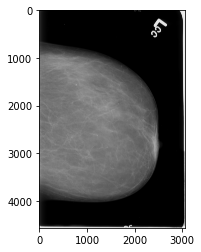

In [29]:
plt.imshow(img, cmap = 'gray')

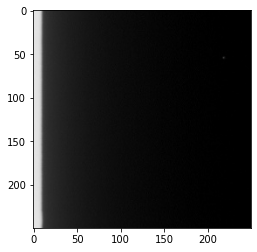

In [30]:
plt.imshow(img[250:500,0:250], cmap = 'gray')

In [31]:
np.sum(img[250:500,0:250])/62500

61.819488

In [32]:
# set crop dim for cropping backgrounds
dim_r = 450
dim_c = 450
stride = 225

In [33]:
def get_pixel_locations(binary_image):
    locations = np.argwhere(binary_image == 255)
    return locations

def crop_image(image, a, b, s, mask_locations):
    cropped_images = []
    height, width, _ = image.shape
    
    for y in range(0, height - b + 1, s*2):
        for x in range(0, width - a + 1, s):
            # Check if any mask location falls within the cropping window
            mask_in_cropped = False
            for my, mx in mask_locations:
                if y <= my < y + b and x <= mx < x + a:
                    mask_in_cropped = True
                    break
            
            if not mask_in_cropped:
                cropped = image[y:y+b, x:x+a]
                if (np.sum(cropped)/(dim_r*dim_c)) > 80:
                    cropped_images.append(cropped)
    
    return cropped_images

In [35]:
image_files = os.listdir(image_folder_path_m)

n = 0
for i in range(0, len(image_files), 10):
    image_name = image_files[i]
    file_path = os.path.join(image_folder_path_m, image_name)
    
    # read image
    img = cv2.imread(file_path)
    
    mask_path = os.path.join(mask_folder_path_m, image_name)
    if os.path.exists(mask_path):
        
        # read mask
        mask = cv2.imread(mask_path)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        
        # get mask locations
        mask_locations = get_pixel_locations(mask)
        cropped_images = crop_image(img, dim_r, dim_c, stride, mask_locations)
        
        # write cropped image file
        for cropped_img in cropped_images:
            name = str(n) + 'm.jpeg'
            dest_path = os.path.join(dest_folder_path, name)
            cv2.imwrite(dest_path, cropped_img)
            n += 1
            
    else:
        print(f'file {mask_path} does not exist')